In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
df = pd.read_csv("canada_per_capita_income.csv")
df.head()

,year,per_capita_income
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


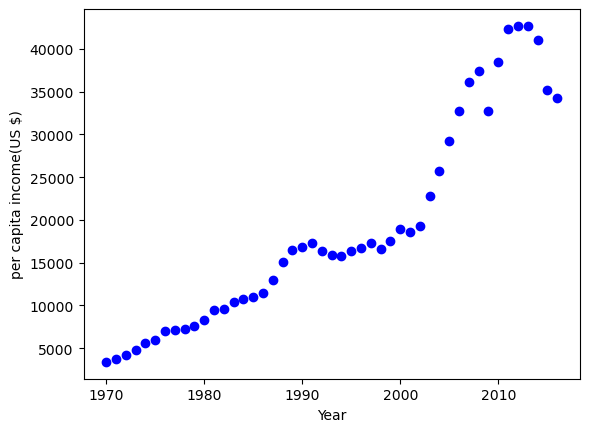

In [3]:
%matplotlib inline
plt.xlabel("Year")
plt.ylabel("per capita income(US $)")
plt.scatter(df.year, df.per_capita_income, color = 'blue')

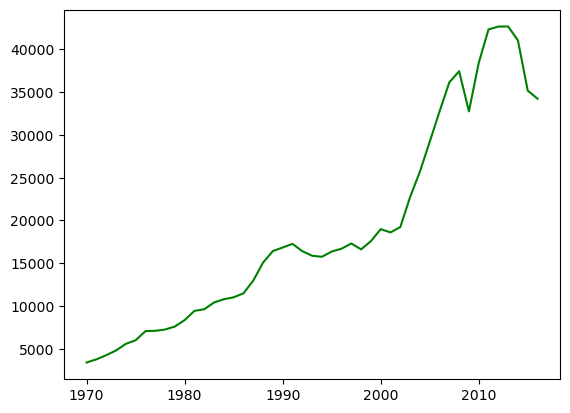

In [4]:
plt.plot(df.year, df.per_capita_income, color = 'green')

In [5]:
#Create a linear regression object
reg = linear_model.LinearRegression()
#fitting my data (training the linear regression model using the availabe data points)
reg.fit(df[['year']], df.per_capita_income)

LinearRegression()

In [6]:
# Let's generate a data to test the accuracy of our model
# Formula: y = mx + b ==> per capita income = coefficient * year + intercept
# First: we need to know our coefficient and intercept:
coefficient = reg.coef_[0]
intercept = reg.intercept_
print("Our coefficient is:", coefficient)
print("Our intercept is:", intercept)

Our coefficient is: 828.4650752227104
Our intercept is: -1632210.7578554575


# Next, we are going to create a function to generate a testing data
- the function take a 'year' as a parameter and calculate 'per capita income' using the formula
- for example, to calculat the income in 2020: 828.46507522 * 2020 + (-1632210.7578554575) = 41288.694088942604

In [7]:
def calculate_income(coefficient, intercept, year):
    return coefficient * year + intercept
    

In [10]:
# Create a list of years where we want to calculate the per capita income:
years = [2018, 2019, 2020, 2021, 2025, 2030]
# list to store the expected per capita income values for each year:
exp_income = []

for year in years:
    income = calculate_income(coefficient, intercept, year)
    exp_income.append(income)

print(exp_income)

[39631.763943972066, 40460.22901919484, 41288.69409441762, 42117.15916964039, 45431.01947053103, 49573.34484664467]


In [11]:
# Let's create our test dataset by merging each year with corresponding per capita income:
# We will use a dictionary comprehension to merge the two lists into a dictionary
income_dict = {year: per_capita_income for year, per_capita_income in zip(years, exp_income)}
print(income_dict)

{2018: 39631.763943972066, 2019: 40460.22901919484, 2020: 41288.69409441762, 2021: 42117.15916964039, 2025: 45431.01947053103, 2030: 49573.34484664467}


In [12]:
test_data = pd.DataFrame(list(income_dict.items()), columns=['years', 'expected_per_capita_income'])
test_data

,years,expected_per_capita_income
0,2018,39631.763944
1,2019,40460.229019
2,2020,41288.694094
3,2021,42117.159170
4,2025,45431.019471
5,2030,49573.344847


In [13]:
# Convert the pandas dataframe into a csv file and save it:
test_csv = test_data.to_csv("test_data.csv", index=False)

In [14]:
# predict the per capita income in 2020:
model_prediction = reg.predict([[2020]])
model_prediction

C:\Users\aboja\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([41288.69409442])

In [15]:
# Convert 1D array (like a list) into a 2D array with a single column (column wise vector)
years_array = np.array(years).reshape(-1, 1) 
years_array

array([[2018],
       [2019],
       [2020],
       [2021],
       [2025],
       [2030]])

In [16]:
predicted_income = reg.predict(years_array)
predicted_income

C:\Users\aboja\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([39631.76394397, 40460.22901919, 41288.69409442, 42117.15916964,
       45431.01947053, 49573.34484664])

In [17]:
# Let's compare our Model predicted income wiht the formula expected income:
lst_predicted_income = list(predicted_income)
print("Model predicted income:", lst_predicted_income)
print("Formula based expected income:", exp_income)

Model predicted income: [39631.763943972066, 40460.22901919484, 41288.69409441762, 42117.15916964039, 45431.01947053103, 49573.34484664467]
Formula based expected income: [39631.763943972066, 40460.22901919484, 41288.69409441762, 42117.15916964039, 45431.01947053103, 49573.34484664467]


In [18]:
# create a for loop to comapre values automatically:
for value in lst_predicted_income:
    value_index = lst_predicted_income.index(value)
    if value == exp_income[value_index]:
        print(f"Test {value_index + 1}: The predicted value matches the expected value --> Pass")
    else:
        print(f"Test {value_index + 1}: The predicted value don't matche the expected value --> Fail")
        

Test 1: The predicted value matches the expected value --> Pass
Test 2: The predicted value matches the expected value --> Pass
Test 3: The predicted value matches the expected value --> Pass
Test 4: The predicted value matches the expected value --> Pass
Test 5: The predicted value matches the expected value --> Pass
Test 6: The predicted value matches the expected value --> Pass
